In [1]:
import pandas as pd
import numpy as np
import spacy
from nltk.tokenize import sent_tokenize, word_tokenize
import networkx as nx
import igraph as ig
import matplotlib.pyplot as plt
from collections import Counter
from urllib.request import urlopen

# Q1

## Chess Transfers

For this question we are going to use the following dataset:

In [2]:
chess = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/chess-transfers/transfers.csv')
chess

,url,ID,Federation,Form.Fed,Transfer Date
0,https://ratings.fide.com/fedchange.phtml?year=...,2019221,USA,PHI,12/15/00
1,https://ratings.fide.com/fedchange.phtml?year=...,14401754,BIH,CRO,1/31/00
2,https://ratings.fide.com/fedchange.phtml?year=...,14401762,BIH,YUG,1/31/00
3,https://ratings.fide.com/fedchange.phtml?year=...,2019221,USA,PHI,12/15/00
4,https://ratings.fide.com/fedchange.phtml?year=...,14401754,BIH,CRO,1/31/00
...,...,...,...,...,...
927,https://ratings.fide.com/fedchange.phtml?year=...,1628313,GER,AUT,1/9/17
928,https://ratings.fide.com/fedchange.phtml?year=...,5200393,SGP,PHI,1/11/17
929,https://ratings.fide.com/fedchange.phtml?year=...,2002515,POL,USA,1/9/17
930,https://ratings.fide.com/fedchange.phtml?year=...,407747,SCO,ENG,1/12/17


first we clean the rows that are the same

In [3]:
chess2=chess.drop_duplicates(keep='first')

In [4]:
chess2

,url,ID,Federation,Form.Fed,Transfer Date
0,https://ratings.fide.com/fedchange.phtml?year=...,2019221,USA,PHI,12/15/00
1,https://ratings.fide.com/fedchange.phtml?year=...,14401754,BIH,CRO,1/31/00
2,https://ratings.fide.com/fedchange.phtml?year=...,14401762,BIH,YUG,1/31/00
6,https://ratings.fide.com/fedchange.phtml?year=...,6700284,ESA,HON,11/15/01
7,https://ratings.fide.com/fedchange.phtml?year=...,1613782,AUT,ISR,7/9/01
...,...,...,...,...,...
904,https://ratings.fide.com/fedchange.phtml?year=...,1628313,GER,AUT,1/9/17
905,https://ratings.fide.com/fedchange.phtml?year=...,5200393,SGP,PHI,1/11/17
906,https://ratings.fide.com/fedchange.phtml?year=...,2002515,POL,USA,1/9/17
907,https://ratings.fide.com/fedchange.phtml?year=...,407747,SCO,ENG,1/12/17


1. Calculate the number of chess masters moved to each federation. You must obtain a pandas data frame with two columns: Federation name and the number of grand masters moved into that specific federation.

In [5]:
count=Counter(chess2['Federation'])
fed=count.keys()
num=count.values()

In [6]:
df=pd.DataFrame(list(zip(fed,num)) , columns =['Federation name', 'the number of grand masters'])
df

,Federation name,the number of grand masters
0,USA,66
1,BIH,28
2,ESA,1
3,AUT,21
4,AUS,18
...,...,...
100,GUY,1
101,KOS,1
102,MAD,1
103,BLR,1


2. Sort the table (highest to the lowest.)

In [7]:
sorted_df=df.sort_values(by=['the number of grand masters'], ascending=False,ignore_index=True)
sorted_df

,Federation name,the number of grand masters
0,USA,66
1,GER,41
2,ESP,32
3,CAN,30
4,CRO,28
...,...,...
100,JAP,1
101,LBA,1
102,MGL,1
103,LBN,1


3. Display the top 10 federations as a bar chart.

<BarContainer object of 10 artists>

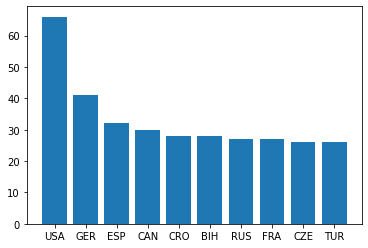

In [8]:
top10=sorted_df.head(10)
labels=list(top10['Federation name'])
values=list(top10['the number of grand masters'])
plt.bar(labels,values)

4. Construct a python dictionary where the keys are pairs of federations (A,B) and the values are number of times grand masters moved from federation A to federation B.

In [9]:
df2=chess2['Form.Fed']+'-'+chess2['Federation']
count=Counter(df2)
count

Counter({'PHI-USA': 4,
         'CRO-BIH': 7,
         'YUG-BIH': 1,
         'HON-ESA': 1,
         'ISR-AUT': 1,
         'CAN-AUS': 1,
         'YUG-CAN': 2,
         'AZE-USA': 2,
         'ENG-CAN': 1,
         'GER-ITA': 2,
         'ESP-PAR': 1,
         'GEO-USA': 3,
         'GER-SUI': 6,
         'BEL-YUG': 1,
         'CRO-CHI': 1,
         'RUS-UKR': 6,
         'LBN-SVK': 1,
         'UZB-RUS': 2,
         'RUS-USA': 4,
         'AUT-SUI': 1,
         'ARM-USA': 4,
         'UKR-BUL': 1,
         'MNC-FRA': 1,
         'FRA-ESP': 1,
         'RUS-GER': 11,
         'CAN-YUG': 2,
         'ROM-ESP': 1,
         'ENG-JCI': 1,
         'CAN-ROM': 1,
         'BUL-MKD': 1,
         'ESP-HON': 1,
         'SVK-CAN': 1,
         'IRL-ENG': 1,
         'YUG-SVK': 1,
         'BIH-GER': 2,
         'USA-CAN': 3,
         'UKR-USA': 5,
         'MDA-FRA': 1,
         'SMR-AUT': 1,
         'ISR-CAN': 5,
         'POL-USA': 1,
         'RUS-ISR': 4,
         'JOR-MAR': 1,
         '

5. Filter the dictionary and retain only the pairs that appear 5 or more times.

In [10]:
newDict={}
for (key, value) in count.items():
    if value>=5:
        newDict[key] = value

In [11]:
newDict

{'CRO-BIH': 7,
 'GER-SUI': 6,
 'RUS-UKR': 6,
 'RUS-GER': 11,
 'UKR-USA': 5,
 'ISR-CAN': 5,
 'CUB-USA': 5,
 'CUB-ESP': 5,
 'ESP-AND': 6,
 'RUS-CZE': 7,
 'UKR-GER': 10,
 'SCG-CRO': 8,
 'SVK-CZE': 8,
 'BIH-CRO': 7,
 'UKR-RUS': 12,
 'SRB-CRO': 6,
 'CHN-SIN': 5,
 'ENG-WLS': 7,
 'SRB-BIH': 16,
 'IND-USA': 10,
 'ROU-FRA': 6,
 'FRA-MNC': 17,
 'AZE-TUR': 7}

6. Constuct a **directed** `networkx` graph from the keys of the dictionary you constructed in step 5.
7. Display the graph.

In [12]:
a=[]
for i in newDict.keys():
    c=i.split('-')
    a.append(c)

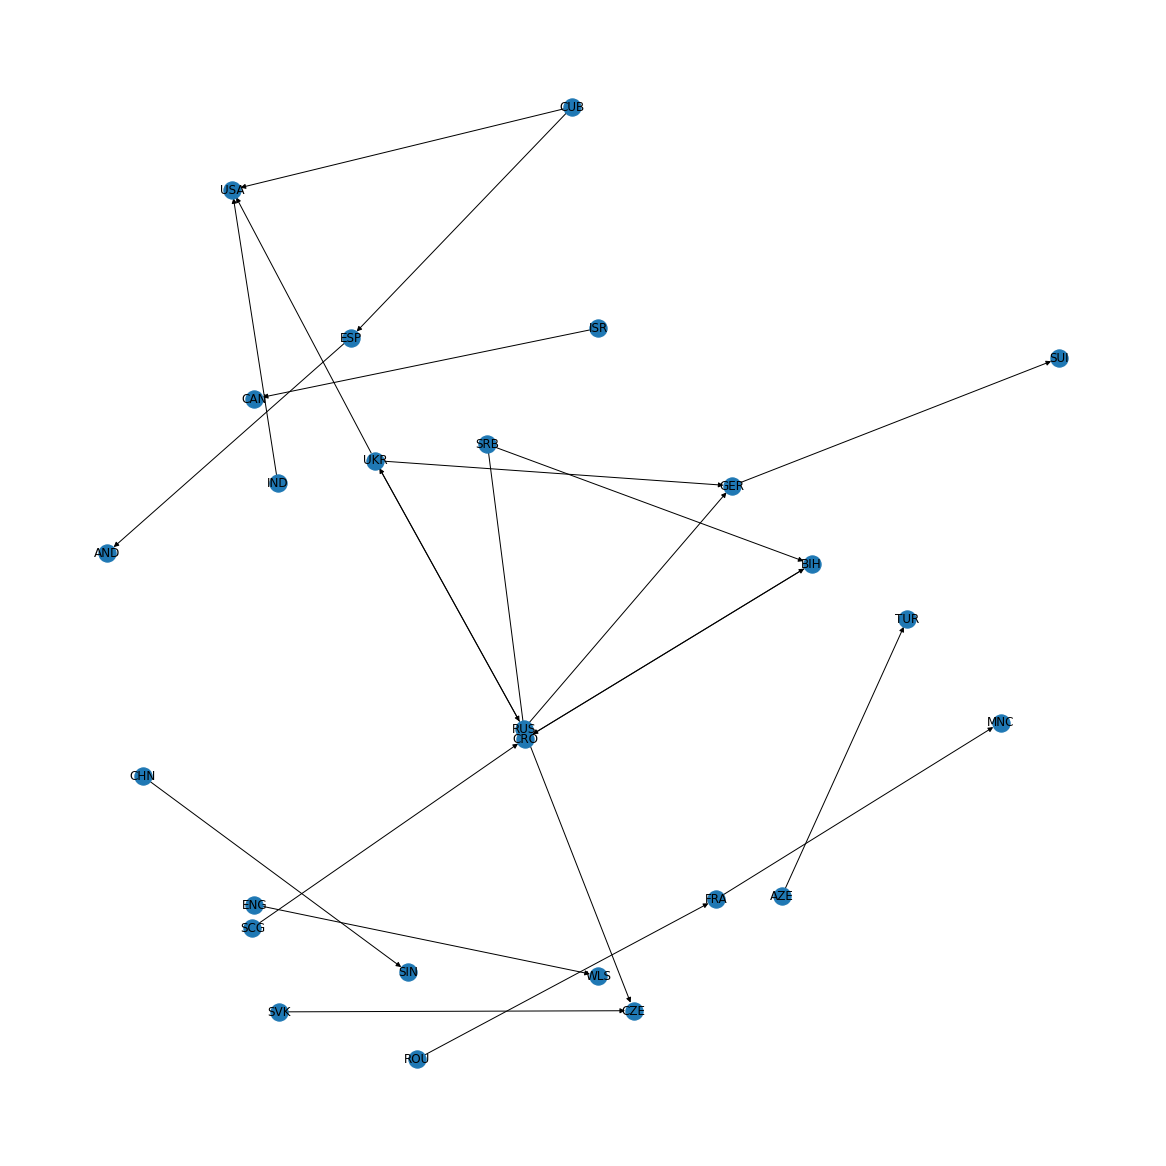

In [13]:
fed_graph = nx.DiGraph()
fed_graph.add_edges_from(a)
plt.figure(figsize=(16,16))
nx.draw_kamada_kawai(fed_graph, with_labels=True)

The data shows chess grand masters moving one chess federation to another chess federation.

1. Calculate the number of chess masters moved to each federation. You must obtain a pandas data frame with two columns: Federation name and the number of grand masters moved into that specific federation.
2. Sort the table (highest to the lowest.)
3. DIsplay the top 10 federations as a bar chart.
4. Construct a python dictionary where the keys are pairs of federations (A,B) and the values are number of times grand masters moved from federation A to federation B.
5. Filter the dictionary and retain only the pairs that appear 5 or more times.
6. Constuct a **directed** `networkx` graph from the keys of the dictionary you constructed in step 5.
7. Display the graph.

# Q2

## NBA Players

For this question we are going to use the following dataset:

In [14]:
NBA = pd.read_csv('https://sports-statistics.com/database/basketball-data/nba/2018-19_pbp.csv')
NBA

,Unnamed: 0,EVENTMSGACTIONTYPE,EVENTMSGTYPE,EVENTNUM,GAME_ID,HOMEDESCRIPTION,NEUTRALDESCRIPTION,PCTIMESTRING,PERIOD,PERSON1TYPE,...,PLAYER3_ID,PLAYER3_NAME,PLAYER3_TEAM_ABBREVIATION,PLAYER3_TEAM_CITY,PLAYER3_TEAM_ID,PLAYER3_TEAM_NICKNAME,SCORE,SCOREMARGIN,VISITORDESCRIPTION,WCTIMESTRING
0,0,0,12,2,21800794,NaN,NaN,12:00,1,0.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9:11 PM
1,1,0,10,4,21800794,Jump Ball Ayton vs. Faried: Tip to Okobo,NaN,12:00,1,4.0,...,1629059,Elie Okobo,PHX,Phoenix,1.610613e+09,Suns,NaN,NaN,NaN,9:11 PM
2,2,1,5,7,21800794,Jackson Bad Pass Turnover (P1.T1),NaN,11:39,1,4.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Harden STEAL (1 STL),9:11 PM
3,3,6,1,9,21800794,NaN,NaN,11:31,1,5.0,...,0,NaN,NaN,NaN,NaN,NaN,2 - 0,-2,Harden 3' Driving Layup (2 PTS),9:12 PM
4,4,2,6,10,21800794,Bridges S.FOUL (P1.T1) (E.Dalen),NaN,11:31,1,4.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9:12 PM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582463,431,1,9,634,21801037,NaN,NaN,0:04,4,3.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cavaliers Timeout: Regular (Reg.6 Short 0),10:49 PM
582464,432,0,8,635,21801037,NaN,NaN,0:04,4,5.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SUB: Clarkson FOR Zizic,10:50 PM
582465,433,63,2,638,21801037,NaN,NaN,0:02,4,5.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MISS Stauskas 24' 3PT Fadeaway Jumper,10:51 PM
582466,434,0,4,639,21801037,Kleber REBOUND (Off:5 Def:7),NaN,0:02,4,4.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10:51 PM


The data contains play-by-play information about all games from the 2018-2019 NBA season. We are interested in the columns 'PLAYER1_ID', 'PLAYER1_NAME', 'PLAYER2_ID', 'PLAYER2_NAME', 'PLAYER3_ID', 'PLAYER3_NAME'. If the specific entry involves two or more players PLAYER2_ID, PLAYER2_NAME, PLAYER3_ID, PLAYER3_NAME are going to be non-empty. 

1. Construct a list of pairs that contains pairs of player names in interaction. If the play-by-play involves 3 players A,B and C you must have 2 entries: A,B and A,C (write the pairs in the dictionary order).
2. Construct a python  dictionary where the keys are pairs of player names and the values are the number of times each pair appears in the list you constructed in step 1.
3. Filter the list and keep only the entries that appear more than 74 times (i.e. 75 or more).
4. Construct a `igraph` graph from the data you obtained from step 3.
5. Display the graph.
6. List the maximal cliques using the `maximal_cliques` of the graph data structure.

In [15]:
df=NBA[['PLAYER1_ID','PLAYER1_NAME','PLAYER2_ID','PLAYER2_NAME','PLAYER3_ID','PLAYER3_NAME']].copy()

In [16]:
df

,PLAYER1_ID,PLAYER1_NAME,PLAYER2_ID,PLAYER2_NAME,PLAYER3_ID,PLAYER3_NAME
0,0,NaN,0,NaN,0,NaN
1,1629028,Deandre Ayton,202702,Kenneth Faried,1629059,Elie Okobo
2,1628367,Josh Jackson,201935,James Harden,0,NaN
3,201935,James Harden,0,NaN,0,NaN
4,1628969,Mikal Bridges,201935,James Harden,0,NaN
...,...,...,...,...,...,...
582463,1610612739,NaN,0,NaN,0,NaN
582464,1627790,Ante Zizic,203903,Jordan Clarkson,0,NaN
582465,203917,Nik Stauskas,0,NaN,0,NaN
582466,1628467,Maxi Kleber,0,NaN,0,NaN


1. Construct a list of pairs that contains pairs of player names in interaction. If the play-by-play involves 3 players A,B and C you must have 2 entries: A,B and A,C (write the pairs in the dictionary order).

In [17]:
filt=df['PLAYER1_ID']!=0
filt2=(df['PLAYER1_ID']!=0) &(df['PLAYER2_ID']!=0)
filt3=(df['PLAYER1_ID']!=0) & (df['PLAYER2_ID']!=0) &(df['PLAYER3_ID']!=0)

In [18]:
data2=df.loc[filt2]
data3=df.loc[filt3]

In [19]:
liste=data2['PLAYER1_NAME']+'-'+data2['PLAYER2_NAME']   

In [20]:
liste2=data3['PLAYER1_NAME']+'-'+data3['PLAYER3_NAME']


In [21]:
liste2=list(liste2)
liste=list(liste)
liste=liste+liste2

In [22]:
liste

['Deandre Ayton-Kenneth Faried',
 'Josh Jackson-James Harden',
 'Mikal Bridges-James Harden',
 'James Harden-Devin Booker',
 'Elie Okobo-James Ennis III',
 'James Harden-Deandre Ayton',
 'Josh Jackson-James Harden',
 'Deandre Ayton-Elie Okobo',
 'Kenneth Faried-Chris Paul',
 'Elie Okobo-Chris Paul',
 'Elie Okobo-Chris Paul',
 'Chris Paul-Elie Okobo',
 'Elie Okobo-Chris Paul',
 'Deandre Ayton-Elie Okobo',
 'Kenneth Faried-Josh Jackson',
 'Chris Paul-Josh Jackson',
 'Josh Jackson-James Ennis III',
 'James Harden-Chris Paul',
 'Elie Okobo-Kelly Oubre Jr.',
 'Kenneth Faried-Austin Rivers',
 'Chris Paul-Nene',
 'PJ Tucker-Austin Rivers',
 'Nene-Devin Booker',
 'James Ennis III-Gerald Green',
 'Kelly Oubre Jr.-Josh Jackson',
 'James Harden-Mikal Bridges',
 'Devin Booker-Mikal Bridges',
 'Nene-Deandre Ayton',
 'Gerald Green-James Harden',
 'Kelly Oubre Jr.-James Harden',
 'Devin Booker-Richaun Holmes',
 'Deandre Ayton-Jamal Crawford',
 'Mikal Bridges-Elie Okobo',
 'PJ Tucker-Chris Paul',
 'Ne

2. Construct a python  dictionary where the keys are pairs of player names and the values are the number of times each pair appears in the list you constructed in step 1.

In [23]:
count=Counter(liste)
count

Counter({'Deandre Ayton-Kenneth Faried': 1,
         'Josh Jackson-James Harden': 5,
         'Mikal Bridges-James Harden': 8,
         'James Harden-Devin Booker': 1,
         'Elie Okobo-James Ennis III': 1,
         'James Harden-Deandre Ayton': 4,
         'Deandre Ayton-Elie Okobo': 22,
         'Kenneth Faried-Chris Paul': 31,
         'Elie Okobo-Chris Paul': 3,
         'Chris Paul-Elie Okobo': 1,
         'Kenneth Faried-Josh Jackson': 2,
         'Chris Paul-Josh Jackson': 1,
         'Josh Jackson-James Ennis III': 1,
         'James Harden-Chris Paul': 98,
         'Elie Okobo-Kelly Oubre Jr.': 6,
         'Kenneth Faried-Austin Rivers': 14,
         'Chris Paul-Nene': 5,
         'PJ Tucker-Austin Rivers': 31,
         'Nene-Devin Booker': 1,
         'James Ennis III-Gerald Green': 22,
         'Kelly Oubre Jr.-Josh Jackson': 27,
         'James Harden-Mikal Bridges': 3,
         'Devin Booker-Mikal Bridges': 42,
         'Nene-Deandre Ayton': 1,
         'Gerald Green-Ja

3. Filter the list and keep only the entries that appear more than 74 times (i.e. 75 or more).

In [24]:
newDict={}
for (key, value) in count.items():
    if value>74:
        newDict[key] = value

In [25]:
newDict

{'James Harden-Chris Paul': 98,
 'Richaun Holmes-Deandre Ayton': 88,
 'Deandre Ayton-Devin Booker': 102,
 'Deandre Ayton-Richaun Holmes': 132,
 'Donovan Mitchell-Joe Ingles': 117,
 'Derrick Favors-Jae Crowder': 106,
 'Rudy Gobert-Derrick Favors': 144,
 "Joe Ingles-Royce O'Neale": 99,
 'Derrick Favors-Rudy Gobert': 96,
 "Royce O'Neale-Joe Ingles": 100,
 'DeAndre Jordan-Luka Doncic': 83,
 'Derrick Favors-Joe Ingles': 115,
 'Bryn Forbes-DeMar DeRozan': 98,
 'Bryn Forbes-Patty Mills': 136,
 'LaMarcus Aldridge-DeMar DeRozan': 125,
 'LaMarcus Aldridge-Jakob Poeltl': 117,
 'Derrick Favors-Ricky Rubio': 79,
 'Marco Belinelli-DeMar DeRozan': 83,
 'Rudy Gobert-Ricky Rubio': 100,
 'Klay Thompson-Kevin Durant': 151,
 'Josh Richardson-Dwyane Wade': 126,
 'Justise Winslow-Josh Richardson': 76,
 'Klay Thompson-Stephen Curry': 104,
 'Kevin Durant-Stephen Curry': 83,
 'Klay Thompson-Andre Iguodala': 85,
 'Stephen Curry-Kevin Durant': 116,
 'Reggie Jackson-Blake Griffin': 78,
 'Julius Randle-Jrue Holida

# Q3

## Charles Dickens' *Great Expectations*

For this question we are going to use the following dataset:

In [26]:
with urlopen('https://www.gutenberg.org/files/1400/1400-0.txt') as f:
    raw = f.read()

greatExpectations = raw[1900:1039269].decode('utf8')

These are the names of the major characters in the novel:

In [27]:
names = [
 'Joe',
 'Pip',
 'Wopsle',
 'Hubble',
 'Pumblechook',
 'Richard',
 'Wopsle',
 'Biddy',
 'Havisham',
 'Joseph',
 'Sarah',
 'Estella',
 'Orlick',
 'Mike',
 'Wemmick',
 'Herbert',
 'Pocket',
 'Jane',
 'Flopson',
 'Coiler',
 'Drummle',
 'Jack',
 'Spider',
 'Handel',
 'Herbert',
 'Clara',
 'Skiffins',
 'Magwitch',
 'Provis',
 'Compeyson',
 'Tom',
 'Bill',
 'Barley',
 'Orlick',
 'William']

names = set(sorted(names))
names

{'Barley',
 'Biddy',
 'Bill',
 'Clara',
 'Coiler',
 'Compeyson',
 'Drummle',
 'Estella',
 'Flopson',
 'Handel',
 'Havisham',
 'Herbert',
 'Hubble',
 'Jack',
 'Jane',
 'Joe',
 'Joseph',
 'Magwitch',
 'Mike',
 'Orlick',
 'Pip',
 'Pocket',
 'Provis',
 'Pumblechook',
 'Richard',
 'Sarah',
 'Skiffins',
 'Spider',
 'Tom',
 'Wemmick',
 'William',
 'Wopsle'}

In [28]:
name=[]
for i in names:
    name.append( i.lower())

1. Split the text into sentences using a sentence tokenizer from your favorite NLP library.

In [29]:
sentences=sent_tokenize(greatExpectations)


2. Construct a list of pairs of names: a pair of names (A,B) appears in the list if and only if both A and B appears in the same sentence. When you store the pair (A,B) in the list make sure A appears before B in the alphabetical order.

In [30]:
a=[]
for i in sentences:
    i=i.lower()
    word=word_tokenize(i)
    if len(set(word)&set(name))>=2:
        a.append(list(set(word)&set(name)))

In [31]:
a

[['pip', 'joe'],
 ['joe', 'pip'],
 ['joe', 'pip'],
 ['joe', 'pip'],
 ['joe', 'pip'],
 ['joe', 'pip'],
 ['pumblechook', 'joe', 'wopsle', 'hubble'],
 ['pumblechook', 'wopsle', 'hubble'],
 ['pumblechook', 'joe'],
 ['wopsle', 'richard'],
 ['pumblechook', 'hubble'],
 ['pumblechook', 'wopsle', 'hubble'],
 ['pumblechook', 'joe'],
 ['joe', 'hubble'],
 ['pumblechook', 'joe'],
 ['pumblechook', 'joe'],
 ['pumblechook', 'joe', 'wopsle', 'hubble'],
 ['wopsle', 'joe'],
 ['wopsle', 'joe'],
 ['wopsle', 'joe'],
 ['wopsle', 'joe'],
 ['pip', 'joe'],
 ['joe', 'pip'],
 ['wopsle', 'joe'],
 ['wopsle', 'biddy'],
 ['wopsle', 'biddy'],
 ['joe', 'pip'],
 ['joe', 'pip'],
 ['joe', 'pip'],
 ['joe', 'pip'],
 ['joe', 'pip'],
 ['joe', 'pip'],
 ['joe', 'pip'],
 ['joe', 'pip'],
 ['joe', 'pip'],
 ['joe', 'pip'],
 ['joe', 'pip'],
 ['joe', 'pip'],
 ['joe', 'pip'],
 ['joe', 'pip'],
 ['joe', 'pip'],
 ['joe', 'pip'],
 ['pumblechook', 'joe'],
 ['pumblechook', 'joe'],
 ['joe', 'havisham'],
 ['pumblechook', 'joe'],
 ['pumblechoo

we use itertools library to find all combinations

In [32]:
import itertools

In [33]:
name_list=[]
for each in a:
    name_list.append(list(itertools.combinations(each, 2)))

In [34]:
name_list2=[]
for each in name_list:
    for i in each:
        name_list2.append(sorted(i))

In [35]:
name_list2

[['joe', 'pip'],
 ['joe', 'pip'],
 ['joe', 'pip'],
 ['joe', 'pip'],
 ['joe', 'pip'],
 ['joe', 'pip'],
 ['joe', 'pumblechook'],
 ['pumblechook', 'wopsle'],
 ['hubble', 'pumblechook'],
 ['joe', 'wopsle'],
 ['hubble', 'joe'],
 ['hubble', 'wopsle'],
 ['pumblechook', 'wopsle'],
 ['hubble', 'pumblechook'],
 ['hubble', 'wopsle'],
 ['joe', 'pumblechook'],
 ['richard', 'wopsle'],
 ['hubble', 'pumblechook'],
 ['pumblechook', 'wopsle'],
 ['hubble', 'pumblechook'],
 ['hubble', 'wopsle'],
 ['joe', 'pumblechook'],
 ['hubble', 'joe'],
 ['joe', 'pumblechook'],
 ['joe', 'pumblechook'],
 ['joe', 'pumblechook'],
 ['pumblechook', 'wopsle'],
 ['hubble', 'pumblechook'],
 ['joe', 'wopsle'],
 ['hubble', 'joe'],
 ['hubble', 'wopsle'],
 ['joe', 'wopsle'],
 ['joe', 'wopsle'],
 ['joe', 'wopsle'],
 ['joe', 'wopsle'],
 ['joe', 'pip'],
 ['joe', 'pip'],
 ['joe', 'wopsle'],
 ['biddy', 'wopsle'],
 ['biddy', 'wopsle'],
 ['joe', 'pip'],
 ['joe', 'pip'],
 ['joe', 'pip'],
 ['joe', 'pip'],
 ['joe', 'pip'],
 ['joe', 'pip'],


In [36]:
 df = pd.DataFrame(name_list2, columns=['A','B'])

In [37]:
c=df['A']+'-'+df['B']

3. Construct a python dictionary where the keys are pairs of names and values are the number of times each pair appears in the list you constructed in step 2.

In [38]:
count=Counter(c)
count

Counter({'joe-pip': 83,
         'joe-pumblechook': 25,
         'pumblechook-wopsle': 7,
         'hubble-pumblechook': 6,
         'joe-wopsle': 14,
         'hubble-joe': 5,
         'hubble-wopsle': 4,
         'richard-wopsle': 2,
         'biddy-wopsle': 5,
         'havisham-joe': 35,
         'joseph-pumblechook': 10,
         'joe-joseph': 3,
         'havisham-pumblechook': 8,
         'pip-pumblechook': 5,
         'estella-havisham': 59,
         'estella-joe': 11,
         'havisham-pip': 28,
         'pip-wopsle': 2,
         'pocket-sarah': 20,
         'estella-pocket': 2,
         'estella-sarah': 2,
         'havisham-sarah': 6,
         'havisham-pocket': 11,
         'pocket-pumblechook': 2,
         'joe-orlick': 5,
         'orlick-pip': 2,
         'orlick-wopsle': 2,
         'biddy-joe': 49,
         'biddy-pip': 19,
         'biddy-estella': 4,
         'biddy-orlick': 2,
         'biddy-havisham': 3,
         'hubble-pip': 1,
         'pocket-wemmick': 5,
   

4. Filter the list and retain only those pairs that appear more than twice (i.e. 3 or more).

In [39]:
newDict={}
for (key, value) in count.items():
    if value>2:
        newDict[key] = value

5. Construct a `networkx` graph using the pairs you have from step 4.
6. Display the graph.

In [40]:
a=[]
for i in newDict.keys():
    c=i.split('-')
    a.append(c)

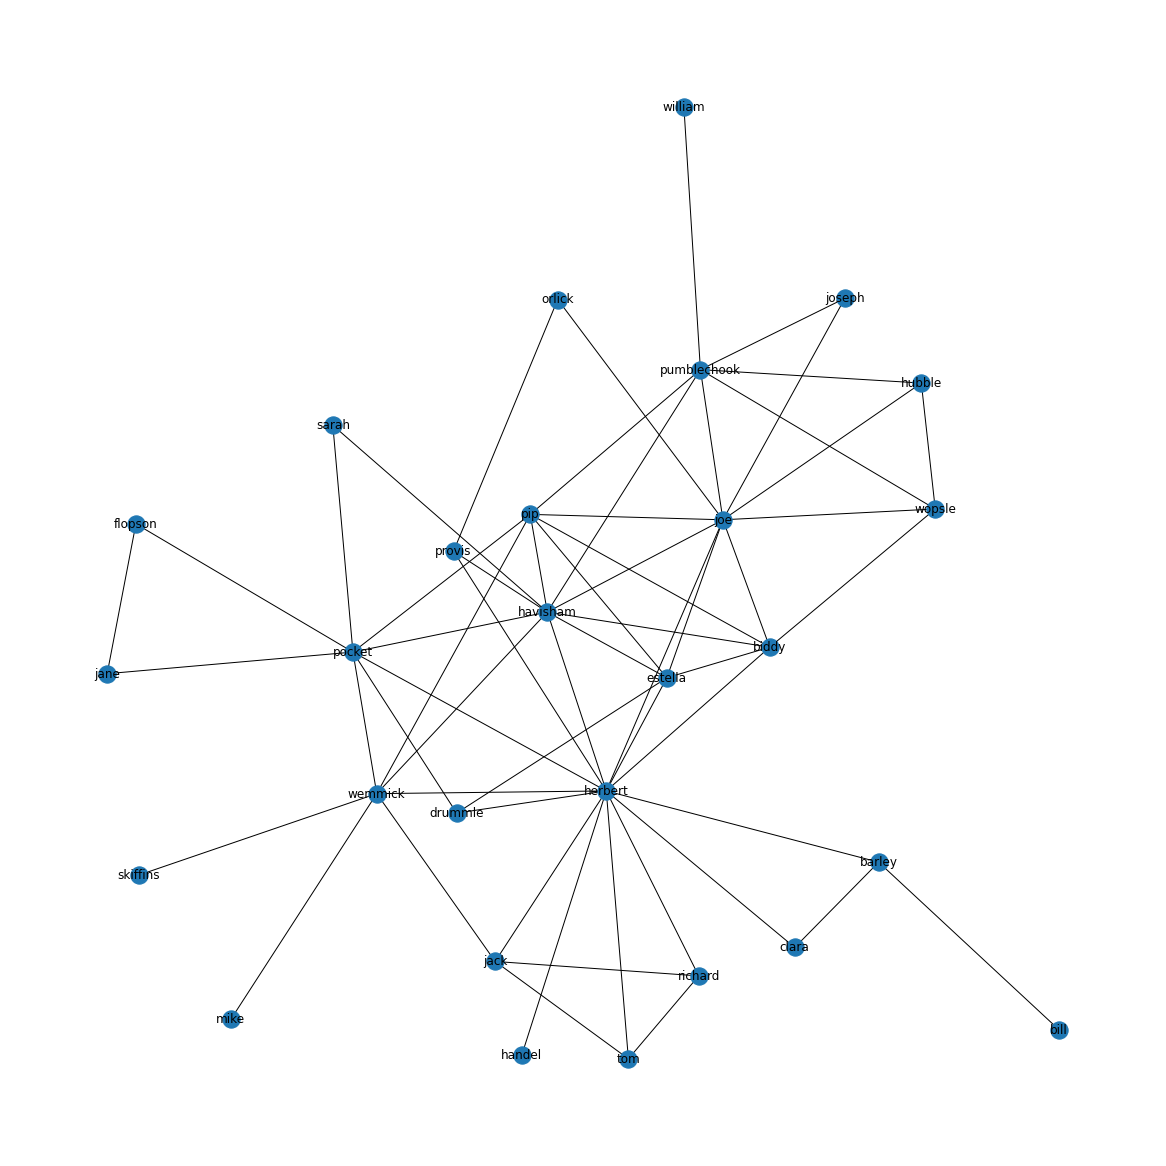

In [41]:
greatExpectationsGraph = nx.Graph()
greatExpectationsGraph.add_edges_from(a)
plt.figure(figsize=(16,16))
nx.draw_kamada_kawai(greatExpectationsGraph, with_labels=True)